<h2>Importing the Data</h2>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import kagglehub

path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\nithy\.cache\kagglehub\datasets\mathchi\diabetes-data-set\versions\1


In [21]:
import pandas as pd

path= path+"\\Diabetes.csv"

df= pd.read_csv(path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h1>Exploratory Data Analysis </h1>

<h2>Exploring the data</h2>

In [22]:
df.size

6912

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [28]:
df[df['Outcome']==1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [29]:
df[df['Outcome']==0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [30]:
print("Max age", df['Age'].max())
print("Min age", df['Age'].min())

Max age 81
Min age 21


In [31]:
df[df["Outcome"]==0].aggregate(['mean','median'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.298,109.98,68.184,19.664,68.792,30.3042,0.429734,31.19,0.0
median,2.000,107.00,70.000,21.000,39.000,30.0500,0.336000,27.00,0.0


In [32]:
df[df["Outcome"]==1].aggregate(['mean','median'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.5505,37.067164,1.0
median,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.4490,36.000000,1.0


In [33]:
bins=[20,30,40,60,82] 
labels=['Young ','Middle-Aged ','Older Adults','Seniors']
df["Agegroup"] = pd.cut(df["Age"].values, bins, right=False, labels=labels)

In [34]:
df= df[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Agegroup',
 'Outcome']]

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Agegroup,Outcome
0,6,148,72,35,0,33.6,0.627,50,Older Adults,1
1,1,85,66,29,0,26.6,0.351,31,Middle-Aged,0
2,8,183,64,0,0,23.3,0.672,32,Middle-Aged,1
3,1,89,66,23,94,28.1,0.167,21,Young,0
4,0,137,40,35,168,43.1,2.288,33,Middle-Aged,1


<h2>Visualization and Analysis</h2>

In [36]:
outcome= df['Outcome'].value_counts()
outcome

Outcome
0    500
1    268
Name: count, dtype: int64

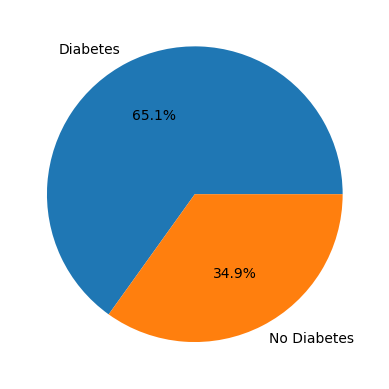

In [37]:
plt.pie(outcome, labels=['Diabetes', 'No Diabetes'] , autopct='%1.1f%%')
plt.show()

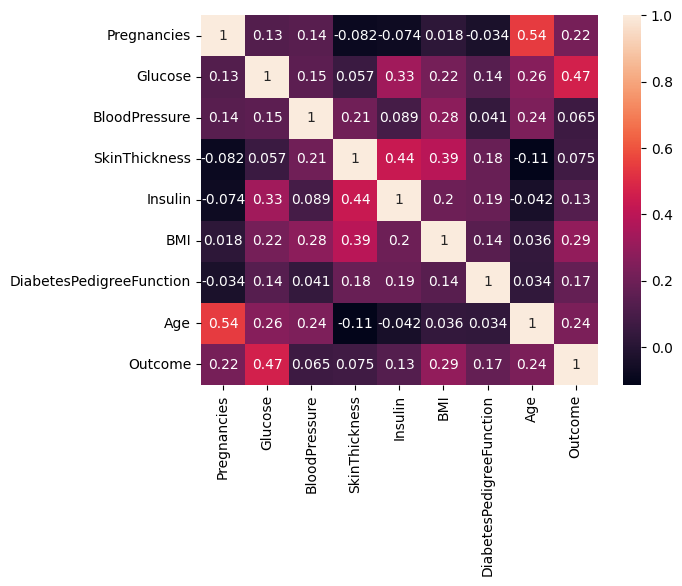

In [38]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
hm= sns.heatmap(data= numeric_df.corr(), annot=True)
plt.show()

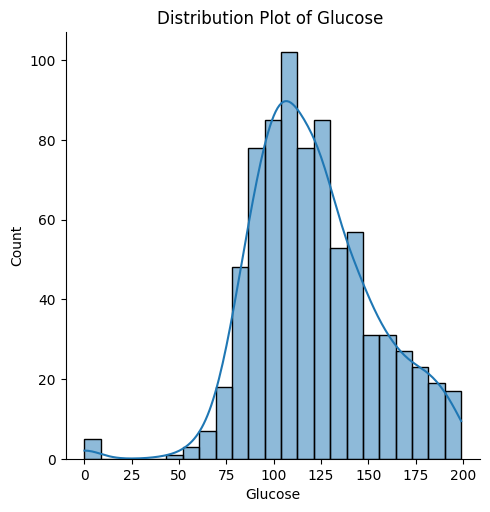

In [39]:

sns.displot(data=df, x="Glucose", kde= True)
plt.title("Distribution Plot of Glucose ")
plt.show()


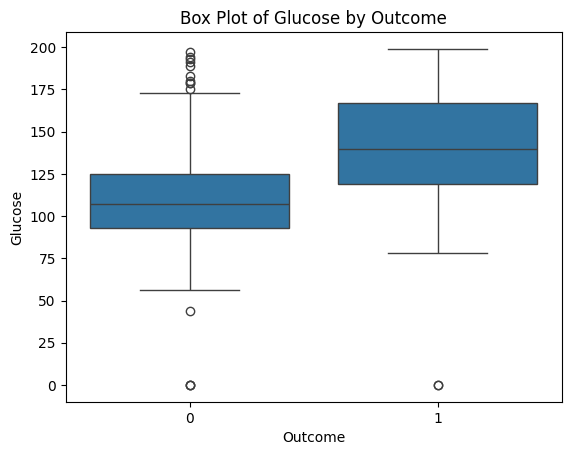

In [40]:
sns.boxplot(data=df, x="Outcome", y="Glucose")
plt.title("Box Plot of Glucose by Outcome")
plt.show()

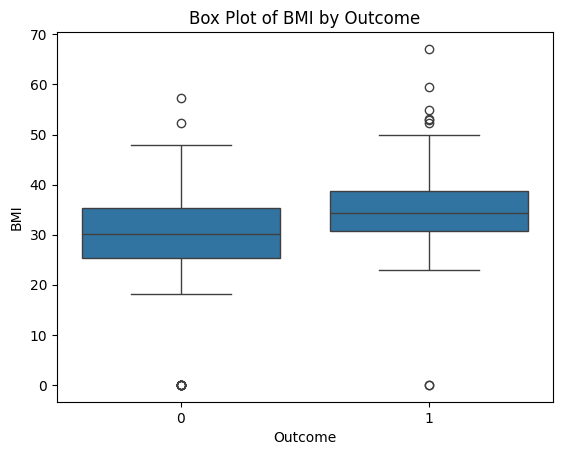

In [73]:
sns.boxplot(data=df, x="Outcome", y="BMI")
plt.title("Box Plot of BMI by Outcome")
plt.show()

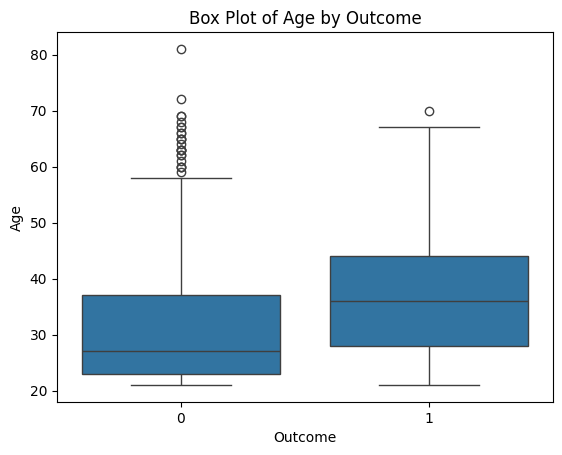

In [74]:
sns.boxplot(data=df, x="Outcome", y="Age")
plt.title("Box Plot of Age by Outcome")
plt.show()

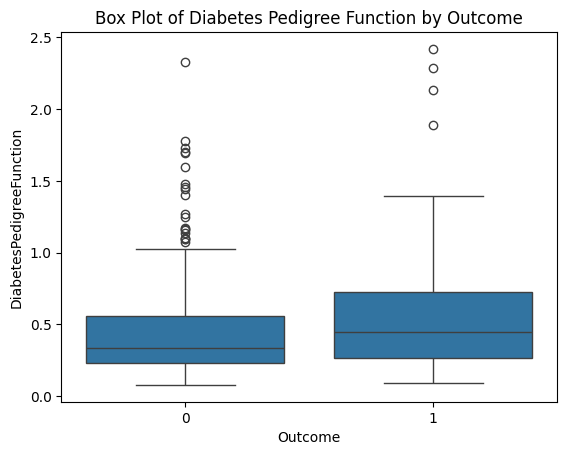

In [75]:
sns.boxplot(data=df, x="Outcome", y="DiabetesPedigreeFunction")
plt.title("Box Plot of Diabetes Pedigree Function by Outcome")
plt.show()

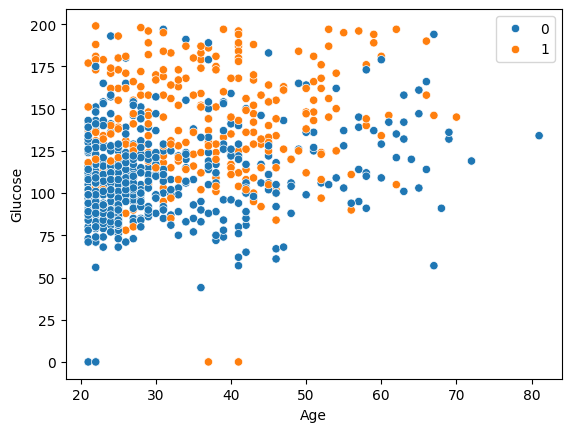

In [41]:
sns.scatterplot(data=df, x="Age", y="Glucose", hue='Outcome')

plt.legend()
plt.show()

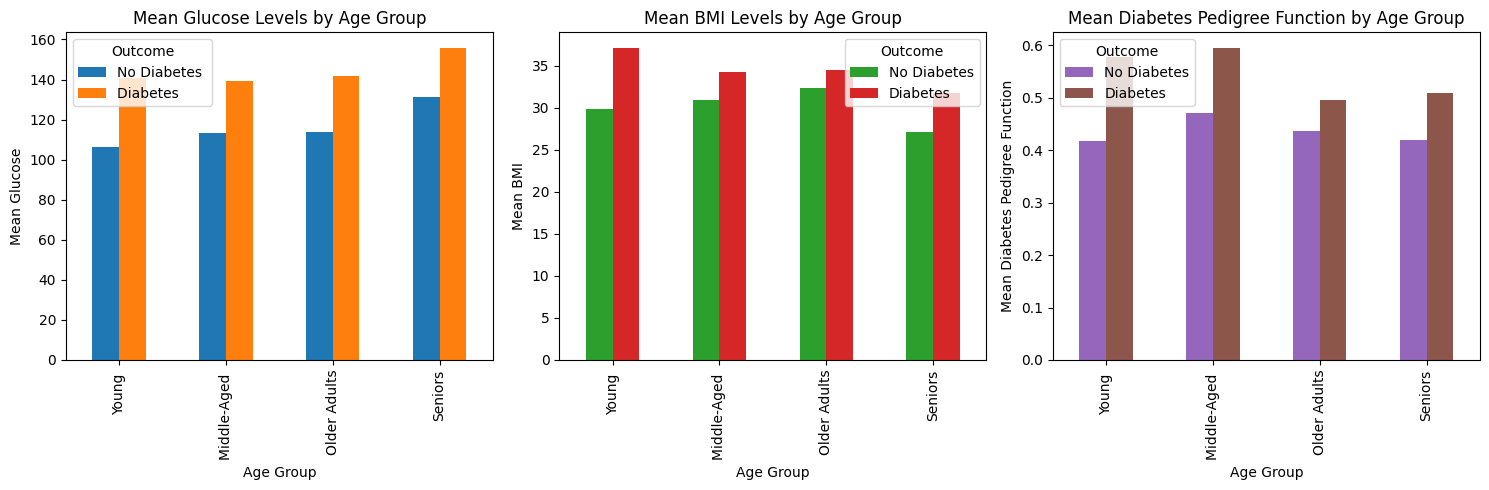

In [71]:
mean_glucose = df.groupby(['Agegroup', 'Outcome'], observed= False)['Glucose'].mean().unstack()
mean_bmi = df.groupby(['Agegroup', 'Outcome'], observed= False)['BMI'].mean().unstack()
mean_diabetes = df.groupby(['Agegroup', 'Outcome'], observed= False)['DiabetesPedigreeFunction'].mean().unstack()
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

mean_glucose.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Mean Glucose Levels by Age Group')
axes[0].set_ylabel('Mean Glucose')
axes[0].set_xlabel('Age Group')
axes[0].legend(['No Diabetes ', 'Diabetes '], title='Outcome')

mean_bmi.plot(kind='bar', ax=axes[1], color=['#2ca02c', '#d62728'])
axes[1].set_title('Mean BMI Levels by Age Group')
axes[1].set_ylabel('Mean BMI')
axes[1].set_xlabel('Age Group')
axes[1].legend(['No Diabetes', 'Diabetes'], title='Outcome')

mean_diabetes.plot(kind='bar', ax=axes[2], color=['#9467bd', '#8c564b'])
axes[2].set_title('Mean Diabetes Pedigree Function by Age Group')
axes[2].set_ylabel('Mean Diabetes Pedigree Function')
axes[2].set_xlabel('Age Group')
axes[2].legend(['No Diabetes', 'Diabetes'], title='Outcome')

plt.tight_layout()

plt.show()



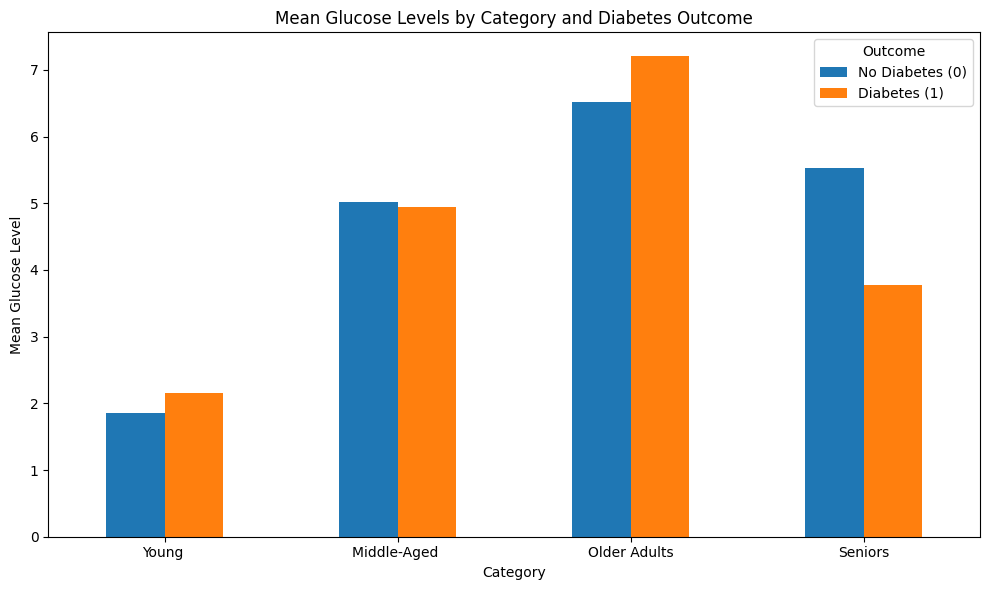

In [76]:
mean_glucose = df.groupby(['Agegroup', 'Outcome'], observed= False)['Pregnancies'].mean().unstack()

mean_glucose.plot(kind='bar', figsize=(10, 6))

plt.title('Mean Glucose Levels by Category and Diabetes Outcome')
plt.ylabel('Mean Glucose Level')
plt.xlabel('Category')
plt.xticks(rotation=0)  
plt.legend(['No Diabetes (0)', 'Diabetes (1)'], title='Outcome')
plt.tight_layout()

plt.show()

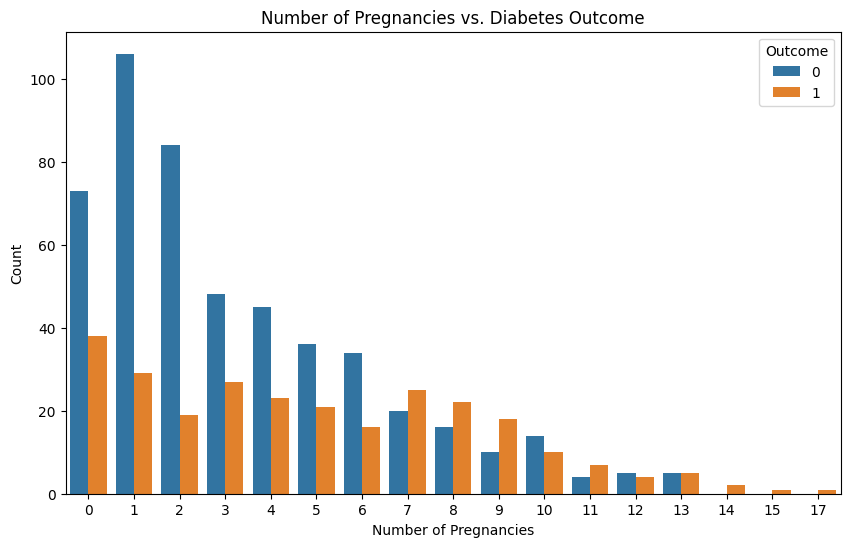

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pregnancies', hue='Outcome', data=df)


plt.title('Number of Pregnancies vs. Diabetes Outcome')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()


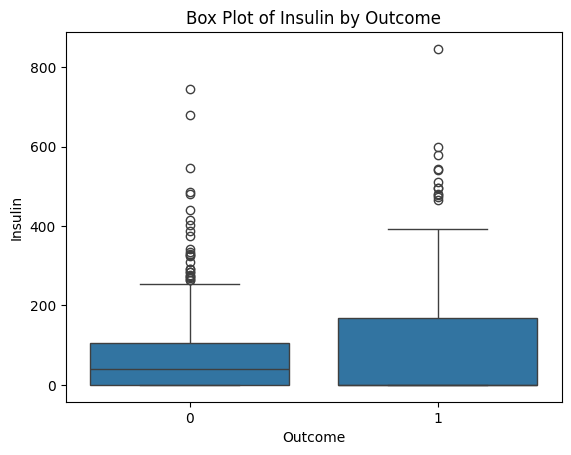

In [52]:
sns.boxplot(data=df, x="Outcome", y="Insulin")
plt.title("Box Plot of Insulin by Outcome")
plt.show()

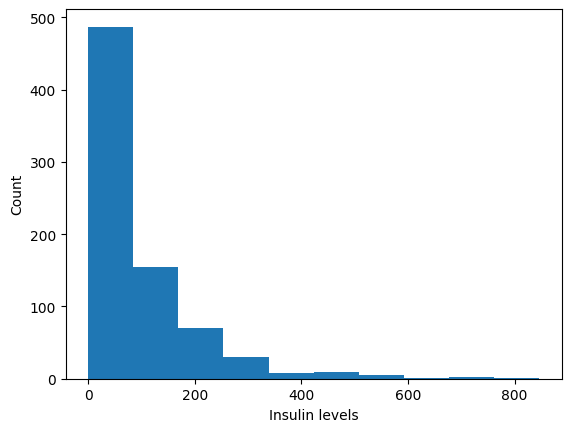

In [53]:
plt.hist(df["Insulin"])
plt.xlabel("Insulin levels")
plt.ylabel("Count")
plt.show()

In [54]:
df[df["Insulin"]>300]["Outcome"].value_counts()

Outcome
1    21
0    16
Name: count, dtype: int64

<h3>Validation Using Machine Learning</h3>

In [56]:
from sklearn.linear_model import LogisticRegression

X = df[['Glucose','BMI','Age','Pregnancies','DiabetesPedigreeFunction']]
y = df['Outcome']  
model = LogisticRegression()
model.fit(X, y)
    
print(f"Coefficient for Glucose: {model.coef_}")

score = model.score(X=X, y=y)
print('Accuracy Score', score)


Coefficient for Glucose: [[0.03287071 0.07967181 0.01228861 0.11877822 0.82152637]]
Test Accuracy Score 0.7799479166666666


In [77]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0, algorithm="SAMME")

clf.fit(X, y)
score=clf.score(X, y)
print('Accuracy Score', score)

Accuracy Score 0.7981770833333334
